# Generate Gaussian Process Samples

Reference: https://github.com/keyonvafa/gp-predictit-blog/blob/master/gp_samples.py

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import sys
epsilon = sys.float_info.epsilon

In [24]:
def rq_covariance(params, x, xp):
    h= params[0]
    alpha = params[1]
    l = params[2]
    diffs = np.expand_dims(x /l, 1) - np.expand_dims(xp/l, 0)
    print(diffs)
    rq = h**2 *np.power(1+np.sum(diffs**2, axis=2)/(2*alpha*l**2),(-1*alpha))
    print(rq)
    return rq

In [120]:
def rbf_covariance(length_scale, x, xp):
    diffs = x.reshape((len(x),1)) - xp.reshape(1,len(xp))
    diff_sq = -diffs**2/(2*length_scale**2)
    rbf = np.exp( diff_sq )
    return rbf

length_scale = 1
n_points = 5
n_samples = 3
x = np.linspace(-5, 5, num=n_points)
m = np.zeros(n_points)
cov = rbf_covariance(length_scale, x, x)

In [92]:
cov.shape

(20, 20)

In [117]:
samples = scipy.stats.multivariate_normal.rvs(mean=m, cov=cov, size=n_samples)
samples.shape

(3, 200)

We can also generate multivariate Gaussian samples using Cholesky decomposition(aka. matrix square root). For details, you can read A.2 on Page 201 in the Appendix A of GPML book written by Rasmussen & Williams.

In [123]:
# K=L*L.T
epsilon = 1.0 ** (-12)
I = np.identity(n_points)
L = np.linalg.cholesky(cov + epsilon*I)
print(L[0,:])
u = np.random.normal(size=(n_points,n_samples))
print(u.shape)
samples = m[:, np.newaxis] + np.dot(L, u)
samples = samples.T
samples.shape

[1.41421356 0.         0.         0.         0.        ]
(5, 3)


(3, 5)

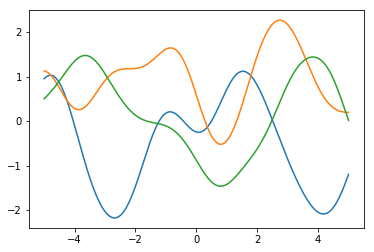

In [118]:
for s in samples:
    plt.plot(x, s)
plt.show()

In [79]:
np.linalg.det(cov + epsilon*np.identity(n_points))

0.01771206873299218

In [100]:
aa = np.arange(2)
print(aa.shape)
print(aa)
bb=aa[np.newaxis,:]
cc=aa[:,np.newaxis]
print(bb)
print(bb.shape)
print(cc)
print(cc.shape)
np.random.normal(size=(2,3))

(2,)
[0 1]
[[0 1]]
(1, 2)
[[0]
 [1]]
(2, 1)


array([[-0.67879405, -0.37947115,  1.57094834],
       [ 1.11524332, -1.54651537, -0.14422195]])

In [ ]:
def plot_gp(ax,params,plot_xs,n_samples = 10,xlab=False,ylab=False):
    #plot_xs = np.reshape(np.linspace(-5, 5, 300), (300,1))
    sampled_funcs = np.random.multivariate_normal(np.ones(len(plot_xs)), rq_covariance(params,plot_xs,plot_xs),\
    					size=10)
    ax.plot(plot_xs, sampled_funcs.T)
    ax.set_title(r'$\alpha = {},\/ l = {} $'.format(\
        params[1],params[2]),fontsize = 22)
    if xlab:
        ax.set_xlabel(r'$x$',fontsize = 20)
    if ylab:
        ax.set_ylabel(r'$f(x)$',fontsize = 20)

fig = plt.figure(figsize=(20,8), facecolor='white')
ax_1 = fig.add_subplot(231, frameon=False)
ax_2 = fig.add_subplot(232, frameon=False)
ax_3 = fig.add_subplot(233, frameon=False)
ax_4 = fig.add_subplot(234, frameon=False)
ax_5 = fig.add_subplot(235, frameon=False)
ax_6 = fig.add_subplot(236, frameon=False)
ax_1.set_xticks([])
ax_1.set_yticks([])
ax_2.set_xticks([])
ax_2.set_yticks([])
ax_3.set_xticks([])
ax_3.set_yticks([])
ax_4.set_xticks([])
ax_4.set_yticks([])
ax_5.set_xticks([])
ax_5.set_yticks([])
ax_6.set_xticks([])
ax_6.set_yticks([])

plot_xs = np.reshape(np.linspace(-5, 5, 300), (300,1))
plot_gp(ax_1,np.array([1,1,.5]),plot_xs,ylab=True)
plot_gp(ax_2,np.array([1,1,1.0]),plot_xs)
plot_gp(ax_3,np.array([1,1,2.0]),plot_xs)
plot_gp(ax_4,np.array([1,.02,1]),plot_xs,ylab=True,xlab=True)
plot_gp(ax_5,np.array([1,.1,1]),plot_xs,xlab=True)
plot_gp(ax_6,np.array([1,2.0,1]),plot_xs,xlab=True)
plt.savefig('gp_samples.png', format='png',bbox_inches='tight')

In [ ]:
plot_xs = np.linspace(0, 1, 5)
diffs = np.reshape(plot_xs, ( len(plot_xs), 1 )) - np.reshape(plot_xs, ( 1, len(plot_xs)))
print(diffs.shape)
print(diffs)

In [40]:
(diffs[:,:,0]**2).shape

(5, 5)

In [42]:
aa=np.sum(diffs**2, axis=2)

In [43]:
aa.shape

(5, 5)

In [ ]:
rq = np.power(1+np.sum(diffs**2, axis=2)/(1),(-1*1))
print(rq.shape)
print(rq)

In [23]:
np.expand_dims(x, 0).shape
diffs = np.expand_dims(x, 1) - np.expand_dims(x, 0)
print(diffs)

[[ 0 -1 -2 -3]
 [ 1  0 -1 -2]
 [ 2  1  0 -1]
 [ 3  2  1  0]]


In [ ]:
l=1
a1=np.expand_dims(x /l, 1)
print(a1)
a1.shape

In [ ]:
a0=np.expand_dims(x /l, 0)
print(a0)
a0.shape

In [ ]:
diffs=a1-a0
print(diffs.shape)
print(diffs)

In [ ]:
mean = [0, 0]
cov = [[10, 15], [15, 100]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 20).T
print(x.shape)
print(x)
print(y.shape)
print(y)
plt.plot(x, y, 'o')
plt.axis('equal')
plt.show()

In [ ]:
aa=np.linspace(-5, 5, 20)

In [ ]:
aa.shape

In [ ]:
print(aa)

In [ ]:
ab = np.reshape(aa,(20,1))

In [ ]:
ac = np.expand_dims(ab, 0)

In [ ]:
ac.shape

In [ ]:
print(ac)

In [ ]:
plot_xs.shape

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats


def gp_samples(n_points, n_samples):
    grid = np.linspace(0, 1, num=n_points)

    mean = np.zeros_like(grid)
    cov = np.minimum(grid[:,None], grid[None,:]) - np.outer(grid, grid)
    samples = scipy.stats.multivariate_normal.rvs(
        mean=mean, cov=cov, size=n_samples)

    for s in samples:
        plt.plot(grid, s)
    plt.show()

In [ ]:
main(20,5)

In [ ]:
grid = np.linspace(0, 1, num=10)
print(grid)
print(grid.shape)
print(grid[:,None].shape)
print(grid[None,:].shape)
np.minimum(grid[:,None], grid[None,:])

In [ ]:
np.outer(grid, grid)

In [124]:
0.99**70

0.49483865960020695

In [125]:
range(3)

range(0, 3)

In [126]:
print(range(3))

range(0, 3)


In [127]:
for i in range(3):
    print(i)

0
1
2
